##Analisi dei Piloti del Mondiale di Formula 1


L'azienda F1 Analytics è specializzata nell'analisi delle prestazioni dei piloti e dei team nel mondo della Formula 1. L'obiettivo di questo progetto è analizzare i risultati del Campionato Mondiale di Formula 1 della stagione 2008, utilizzando i dati contenuti nel file formula1_data.csv.

Questo file contiene informazioni dettagliate sui piloti, i costruttori, le città e i paesi dei Gran Premi, nonché l'ordine di arrivo di ogni pilota. Basandosi su questi dati, verranno implementate diverse funzioni per fornire un'analisi approfondita dei punti, delle vittorie e dei podi sia a livello individuale che di costruttori.

In [ ]:
import pandas as pd

df=pd.read_csv(" https://proai-datasets.s3.eu-west-3.amazonaws.com/formula1_data.csv")
df

,Driver,Team,Race,Country,Position
0,Hamilton,McLaren,Melbourne,Australia,1
1,Massa,Ferrari,Melbourne,Australia,0
2,Raikkonen,Ferrari,Melbourne,Australia,8
3,Kubica,BMW,Melbourne,Australia,0
4,Alonso,Renault,Melbourne,Australia,4
...,...,...,...,...,...
175,Heidfeld,BMW,Interlagos,Brasile,0
176,Kovalainen,McLaren,Interlagos,Brasile,7
177,Vettel,Toro Rosso,Interlagos,Brasile,4
178,Trulli,Toyota,Interlagos,Brasile,8


Il dataset formula1_data.csv contiene le seguenti colonne:
1. Driver: Nome del pilota.
2. Team: Nome del costruttore per il quale il pilota gareggia.
3. Race: Città in cui si è svolto il Gran Premio.
4. Country: Paese in cui si è svolto il Gran Premio.
5. Position: Numero compreso tra 0 e 8 che indica l'ordine di arrivo del pilota (0 significa che il pilota non è arrivato tra i primi 8 e non ha ottenuto punti).

Al termine di ogni Gran Premio, i punti vengono assegnati ai piloti in base al loro ordine di arrivo come segue: - 1° posto: 10 punti - 2° posto: 8 punti - 3° posto: 6 punti - 4° posto: 5 punti - 5° posto: 4 punti - 6° posto: 3 punti - 7° posto: 2 punti - 8° posto: 1 punto - 9° posto o oltre: 0 punti

In [ ]:
import pandas as pd

df=pd.read_csv(" https://proai-datasets.s3.eu-west-3.amazonaws.com/formula1_data.csv")

# Define the scoring system
scoring_system = {1: 10, 2: 8, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1}

# Add a 'Points' column based on the 'Position' column
df['Points'] = df['Position'].map(scoring_system).fillna(0).astype(int)

df

,Driver,Team,Race,Country,Position,Points
0,Hamilton,McLaren,Melbourne,Australia,1,10
1,Massa,Ferrari,Melbourne,Australia,0,0
2,Raikkonen,Ferrari,Melbourne,Australia,8,1
3,Kubica,BMW,Melbourne,Australia,0,0
4,Alonso,Renault,Melbourne,Australia,4,5
...,...,...,...,...,...,...
175,Heidfeld,BMW,Interlagos,Brasile,0,0
176,Kovalainen,McLaren,Interlagos,Brasile,7,2
177,Vettel,Toro Rosso,Interlagos,Brasile,4,5
178,Trulli,Toyota,Interlagos,Brasile,8,1


In [ ]:
df["Driver"] = df["Driver"].str.strip()        # rimuove spazi
df["Driver"] = df["Driver"].str.title()        # uniforma maiuscole

In [ ]:
print(df.head())  #  primi record
print(df["Driver"].unique()[:20])  # i primi 20 nomi piloti
print(df.dtypes)  # controlla i tipi delle colonne


      Driver     Team       Race    Country  Position  Points
0   Hamilton  McLaren  Melbourne  Australia         1      10
1      Massa  Ferrari  Melbourne  Australia         0       0
2  Raikkonen  Ferrari  Melbourne  Australia         8       1
3     Kubica      BMW  Melbourne  Australia         0       0
4     Alonso  Renault  Melbourne  Australia         4       5
['Hamilton' 'Massa' 'Raikkonen' 'Kubica' 'Alonso' 'Heidfeld' 'Kovalainen'
 'Vettel' 'Trulli' 'Glock']
Driver      object
Team        object
Race        object
Country     object
Position     int64
Points       int64
dtype: object


## Sezione 1 – Analisi Performance Individuali Piloti

In [ ]:
import pandas as pd


def analizza_pilota(df, pilota):

    # Filtriamo solo le righe del pilota
    dati_pilota = df[df["Driver"] == pilota]


    # Calcoliamo i valori
    punti_totali = dati_pilota["Points"].sum()
    vittorie = (dati_pilota["Position"] == 1).sum()
    podi = (dati_pilota["Position"].isin([1, 2, 3])).sum()

    # Ritorniamo i risultati
    return {
        "Pilota": pilota,
        "Punti": int(punti_totali),
        "Vittorie": int(vittorie),
        "Podi": int(podi)
    }

# ESEMPIO
print(analizza_pilota(df, "Hamilton"))
print(analizza_pilota(df, "Massa"))

{'Pilota': 'Hamilton', 'Punti': 98, 'Vittorie': 5, 'Podi': 10}
{'Pilota': 'Massa', 'Punti': 97, 'Vittorie': 6, 'Podi': 10}


# Sezione 2 – Classifica Finale Piloti

In [ ]:
# seconda funzione
# definisco una funzione che calcola il totale dei punteggi
# creo un dict vuoto che poi conterrà le informazioni sul Driver e il Punteggio
# utilizzo il ciclio for per iterare su ciascuna riga del ' data_pilot', estraggo il nome del Driver dalla riga in cui itero
# estraggo la posizione utilizzando il medoto get perchè se la posisiozione non è disponibile assume un valore 0
# assegno il punteggio associato alla posizione corrente del dict del punteggio,
# se il Driver è gia presente nel dict la funione aggiunge i punti al totale per Driver
# in driver_points memorizzo i punti totali per Driver
# ordino in maniera decrescende in una lista di dizionari e scrivo i risultati in un file di testo, faccio un print dal file

In [ ]:
def total_points(data_pilot):
    points_dict = {}

    for index, row in data_pilot.iterrows(): # Iterate over rows of the dataframe
      driver = row['Driver']
      Position = int(row.get('Position', 0))
      points = scoring_system.get(Position, 0)

      if driver in points_dict:
          points_dict[driver] += points
      else:
          points_dict[driver] = points

    return points_dict

scoring_system = {1: 10, 2: 8, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1} # Define scoring_system

driver_points = total_points(df)

ordinated_driver_points = [
    {'Driver': driver, 'points': points} for driver, points in sorted(driver_points.items(), key=lambda item: item[1], reverse=True)
]
with open('Drivers_Standings_2008.txt', 'w') as file:
      file.write('Drivers Standings 2008 Formula 1 \n')
      for entry in ordinated_driver_points:
          file.write(f"{entry['Driver']}: {entry['points']}\n")

with open('Drivers_Standings_2008.txt', 'r') as file:
    print(file.read())

Drivers Standings 2008 Formula 1 
Hamilton: 98
Massa: 97
Raikkonen: 75
Kubica: 75
Alonso: 61
Heidfeld: 60
Kovalainen: 53
Vettel: 35
Trulli: 31
Glock: 25



# Sezione 3 – Classifica Costruttori

In [ ]:
# terza funzione
# definisco una funzione che calcola il totale dei punti del team, servendomi anche dei dati 'driver_points' elaborati nella funzione #2
# creo un dict vuoto che poi conterrà le informazioni desiderate (totale punteggi per team)
# istruisco un ciclo for per iterare su ogni riga del data_pilot e driver_points e attraverso i valori booleani assegno i punteggi ai driver
# istruisco una funzione con i dati già ordinati, volendo in output una 'classifica' dei team in una lista di dizionarii


In [ ]:
def total_team_points(data_pilot, driver_points):
    team_points = {}

    for index, row in data_pilot.iterrows():
      driver = row['Driver']
      team = row['Team']
      points = driver_points.get(driver, 0)

      if team in team_points:
          team_points[team] += points
      else:
          team_points[team] = points

    return team_points


team_points = total_team_points(df, driver_points)

# Order the team points and print the standings
ordinated_team_points = [
    {'Team': team, 'Points': points} for team, points in sorted(team_points.items(), key=lambda item: item[1], reverse = True)
]

print('Classifica dei Team:')
for entry in ordinated_team_points:
  print(f"Team {entry['Team']}: {entry['Points']} punti")

Classifica dei Team:
Team Ferrari: 3096 punti
Team McLaren: 2718 punti
Team BMW: 2430 punti
Team Renault: 1098 punti
Team Toyota: 1008 punti
Team Toro Rosso: 630 punti


#Extra - Grafici Vari

      Driver     Team       Race    Country  Position
0   Hamilton  McLaren  Melbourne  Australia         1
1      Massa  Ferrari  Melbourne  Australia         0
2  Raikkonen  Ferrari  Melbourne  Australia         8
3     Kubica      BMW  Melbourne  Australia         0
4     Alonso  Renault  Melbourne  Australia         4

🏎️ Classifica Piloti 2008:
Driver
Hamilton      98
Massa         97
Raikkonen     75
Kubica        75
Alonso        61
Heidfeld      60
Kovalainen    53
Vettel        35
Trulli        31
Glock         25
Name: Points, dtype: int64

🏆 Classifica Costruttori 2008:
Team
Ferrari       172
McLaren       151
BMW           135
Renault        61
Toyota         56
Toro Rosso     35
Name: Points, dtype: int64


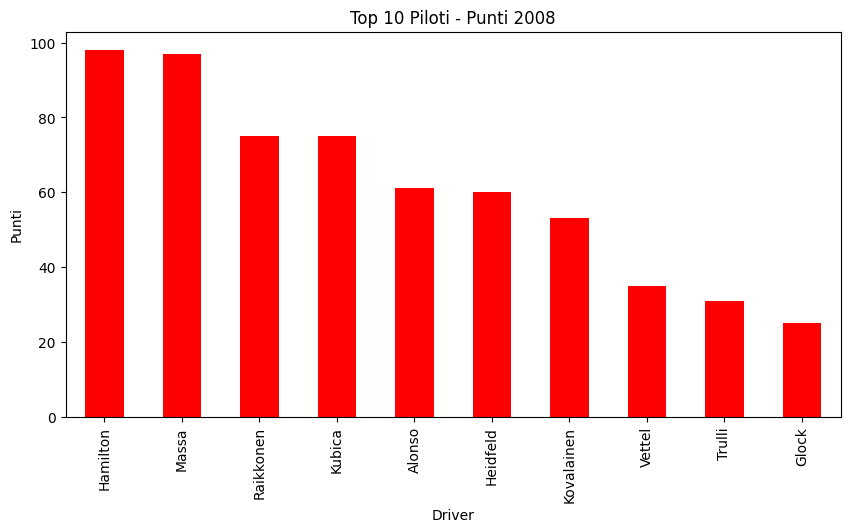

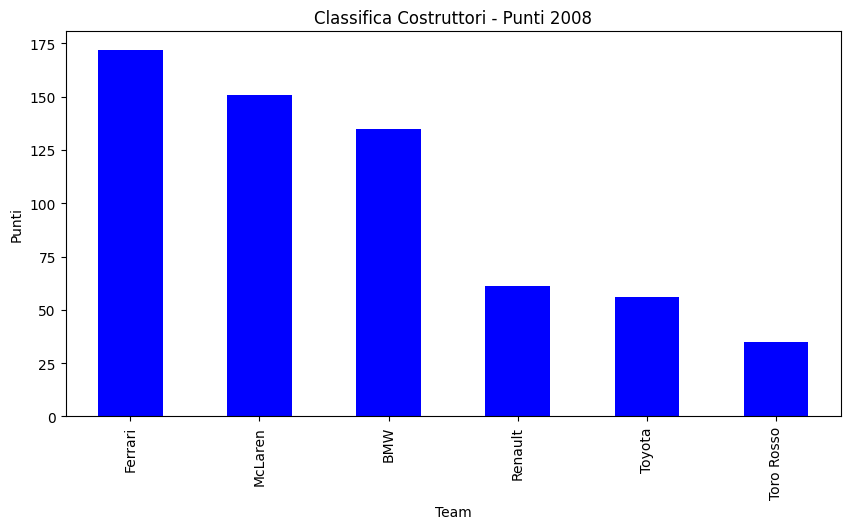

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Caricamento dataset
df = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/formula1_data.csv")
print(df.head())

# 2. Sistema di punteggio
points_system = {1: 10, 2: 8, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1}
df["Points"] = df["Position"].map(points_system).fillna(0).astype(int)

# 3. Classifica piloti
drivers_points = df.groupby("Driver")["Points"].sum().sort_values(ascending=False)
drivers_wins = df[df["Position"] == 1].groupby("Driver").size()
drivers_podiums = df[df["Position"].between(1,3)].groupby("Driver").size()

print("\n🏎️ Classifica Piloti 2008:")
print(drivers_points)

# 4. Classifica team
teams_points = df.groupby("Team")["Points"].sum().sort_values(ascending=False)
teams_wins = df[df["Position"] == 1].groupby("Team").size()
teams_podiums = df[df["Position"].between(1,3)].groupby("Team").size()

print("\n🏆 Classifica Costruttori 2008:")
print(teams_points)

# 5. Visualizzazione
plt.figure(figsize=(10,5))
drivers_points.head(10).plot(kind="bar", color="red")
plt.title("Top 10 Piloti - Punti 2008")
plt.ylabel("Punti")
plt.show()

plt.figure(figsize=(10,5))
teams_points.plot(kind="bar", color="blue")
plt.title("Classifica Costruttori - Punti 2008")
plt.ylabel("Punti")
plt.show()